In [94]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/home/manavparmar/Desktop/ncs_project/List_of_skeletal_muscles_of_the_human_body_1.csv')
new_dataset = dataset.iloc[:,[0,1]].values  

print(new_dataset)

print(new_dataset.shape)

[['occipitalis' 'head, occipitofrontalis, back of skull (left/right)']
 ['frontalis' 'head, occipitofrontalis, forehead (left/right)']
 ['orbicularis oculi, orbital part' 'head, forehead/eyelid (left/right)']
 ['orbicularis oculi, palpebral part'
  'head, forehead/eyelid (left/right)']
 ['orbicularis oculi, deep palpebral (lacrimal) part'
  'head, forehead/eyelid (left/right)']
 ['corrugator supercilii' 'head, eye (left/right)']
 ['depressor supercilii' 'head, eye (left/right)']
 ['levator palpebrae superioris' 'head, extraocular (left/right)']
 ['superior tarsal' 'head, extraocular (left/right)']
 ['rectus, superior' 'head, eye, orbit (left/right)']
 ['rectus, inferior' 'head, eye, orbit (left/right)']
 ['rectus, medial' 'head, eye, orbit (left/right)']
 ['rectus, lateral' 'head, eye, orbit (left/right)']
 ['oblique, superior' 'head, extraocular (left/right)']
 ['oblique, inferior' 'head, extraocular (left/right)']
 ['temporoparietalis' 'head, ear, outer ear (left/right)']
 ['auricula

In [95]:
# arr = []
# for i in range(len(new_dataset)):
#     if(new_dataset[i][1]=='?'):
#         arr.append(new_dataset[i][0])
# print(arr)

In [96]:
# action = ["Adjusts the shape of auricle for sound","Ear movement","Jaw moment","Adjusts tension in vocal cords","Elevates thyroid glands, affects voice","Supports Pelvic floor","Stabilizes the pelvic floor","Compresses urethra","Tightens the vaginal opening","Stabalizes the skin at nape","Assits in chest movement, aiding in respiration","facilitates movement of the little toe"]
# k = 0
# for i in range (len(new_dataset)):
#     if(new_dataset[i][1]=='?'):
#         new_dataset[i][1]=action[k]
#         k+=1

In [97]:
# the below is cleaning of the data
# all the nodes are converted to lowercase in order to make "muscle" and "Muslce" same, though this is done only for the body parts
# not to be included is the array of words which are irrelevant and not to be used
# if the body part has the mention of '(' the substring till ')' will be skipped
# / and , are treated in the same way as they represent similiar things in the original dataset

data = []
not_to_be_included = ["left","right","right?","left?"]

for i in range(len(new_dataset)):
    temp_string = ""
    temp_arr = []
    new_dataset[i][1] = new_dataset[i][1].lower()
    go = True
    for j in range(len(new_dataset[i][1])):
        if(new_dataset[i][1][j] == '(' or new_dataset[i][1][j] == ')'):
            go= not go
            continue
        if(go == False or new_dataset[i][1][j]==' '):
            continue
        if(new_dataset[i][1][j]!=',' and new_dataset[i][1][j]!='/'):
            temp_string += new_dataset[i][1][j]
        elif(new_dataset[i][1][j]==',' or new_dataset[i][1][j]=='/'):
            temp_arr.append(temp_string)
            temp_string = ""

    if(temp_string != ""):
        temp_arr.append(temp_string)

    for j in range(len(temp_arr)):
        if(temp_arr[j] not in not_to_be_included):
            data.append([new_dataset[i][0],temp_arr[j]])

data = np.array(data)
print(data)
print(data.shape)

[['occipitalis' 'head']
 ['occipitalis' 'occipitofrontalis']
 ['occipitalis' 'backofskull']
 ...
 ['plantar interossei 1-3' 'lowerlimb']
 ['plantar interossei 1-3' 'plantar']
 ['plantar interossei 1-3' 'fourthlayer']]
(770, 2)


The graph is bipartite.
Top node with highest degree: (5, 'tibialis posterior')
Bottom node with highest degree: (87, 'head')


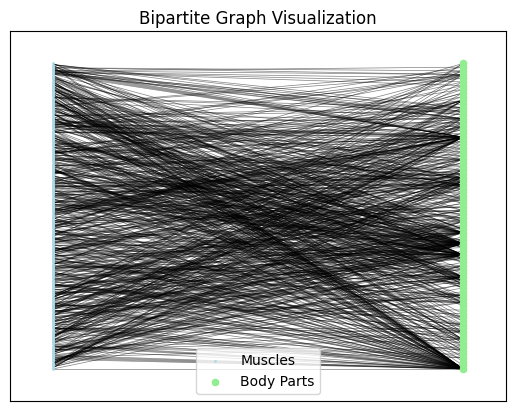

In [101]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.components import connected_components
from networkx.algorithms import bipartite

G = nx.Graph()
G.add_edges_from(data)

# Check if the graph is bipartite
if bipartite.is_bipartite(G):
    print("The graph is bipartite.")
else:
    print("The graph is not bipartite.")


# Determine the sets of nodes
top_nodes = {n for n, d in G.nodes(data=True) if n in data[:, 0]}
bottom_nodes = set(G) - top_nodes

top_node_max_degree = max([(G.degree(n), n) for n in top_nodes])
print(f"Top node with highest degree: {top_node_max_degree}")

# Find the bottom node with the highest degree
bottom_node_max_degree = max([(G.degree(n), n) for n in bottom_nodes])
print(f"Bottom node with highest degree: {bottom_node_max_degree}")

# Generate the layout
pos = nx.bipartite_layout(G, top_nodes)

# Draw the graph with specified options
nx.draw_networkx_nodes(G, pos, nodelist=top_nodes, node_color='lightblue', node_size=1, label='Muscles') # change the node size according to convinience
nx.draw_networkx_nodes(G, pos, nodelist=bottom_nodes, node_color='lightgreen', node_size=20, label='Body Parts')
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.5)

plt.title('Bipartite Graph Visualization')
plt.legend(scatterpoints=1)
plt.show()


In [99]:
print(top_nodes)
print(bottom_nodes)

print(len(top_nodes))
print(len(bottom_nodes))

{'pharyngeal constrictor, superior, mylopharyngeal part', 'superior gemellus', 'levator glandulae thyroideae', 'supraspinatus', 'fibularis tertius', 'extensor digitorum', 'extensor digiti minimi', 'iliocostalis thoracis', 'cremaster', 'tensor veli palatini', 'stylopharyngeus', 'oblique, inferior', 'genioglossus, superior fibers', 'transversus menti', 'rotatores, long 1-11', 'extensor digitorum longus', 'omohyoid, superior belly', 'pubococcygeus', 'tragicus', 'omohyoid, inferior belly', 'rectus capitis, anterior', 'orbicularis oculi, palpebral part', 'palatoglossus', 'cricothyroid, oblique part', 'dorsal interossei (hand) 1-4', 'quadratus lumborum', 'hemidiaphragm, lumbar/costal/sternal part', 'popliteus', 'depressor anguli oris', 'adductor hallucis', 'obturator externus', 'biceps femoris', 'transversus thoracis', 'deltoid, clavicular/acromial/scapular spinal parts', 'gluteus minimus', 'pterygoideus proprius', 'splenius capitis', 'tibialis anterior', 'auricularis posterior', 'frontalis'

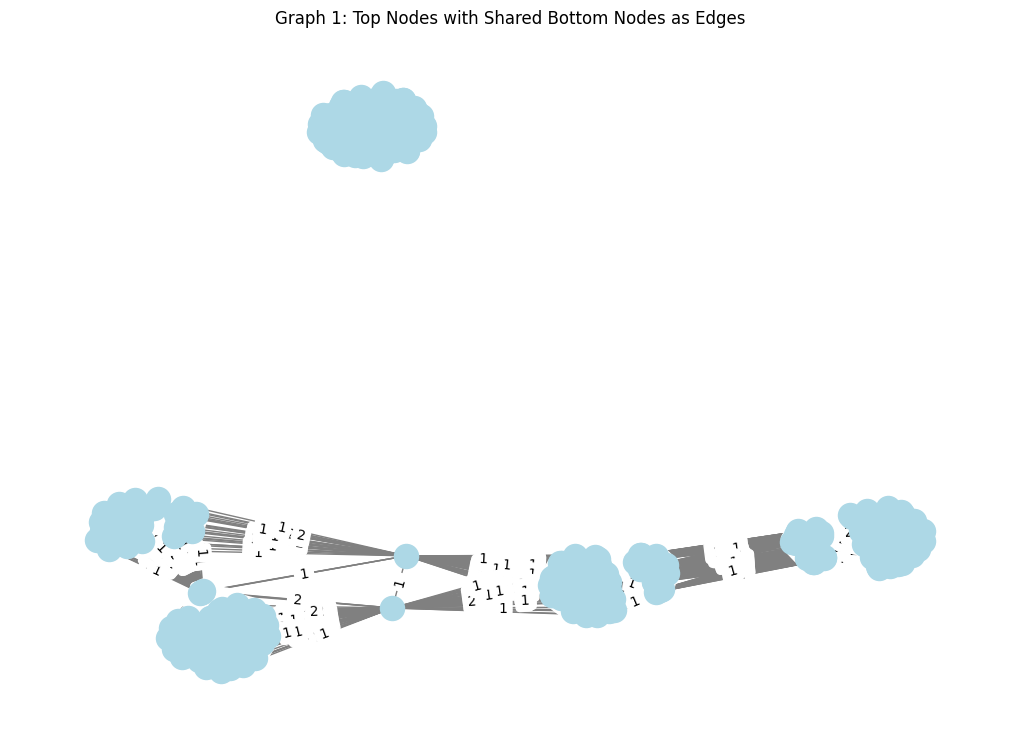

In [105]:
# Create Graph 1
G_top = nx.Graph()

# Add nodes
for node in top_nodes:
    G_top.add_node(node)

# Add edges based on shared bottom nodes
for node1 in top_nodes:
    for node2 in top_nodes:
        if node1 != node2:
            # Find common bottom nodes
            common_nodes = set(G[node1]) & set(G[node2])
            if common_nodes:
                G_top.add_edge(node1, node2, weight=len(common_nodes))

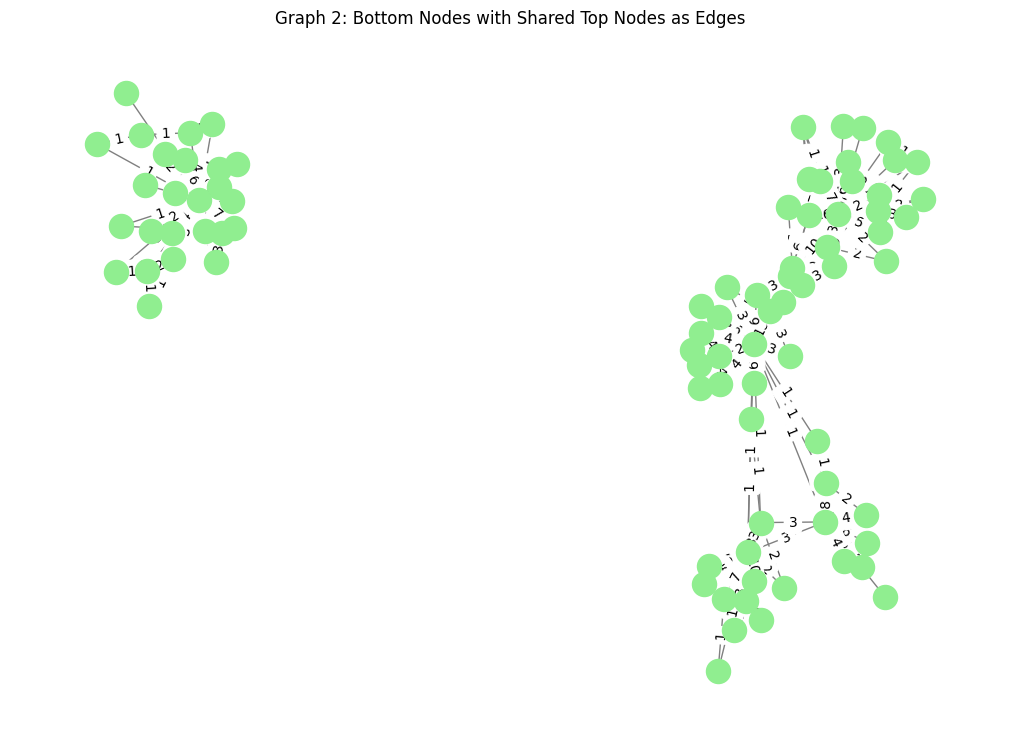

In [104]:
# Create Graph 2
G_bottom = nx.Graph()

# Add nodes
for node in bottom_nodes:
    G_bottom.add_node(node)

# Add edges based on shared top nodes
for node1 in bottom_nodes:
    for node2 in bottom_nodes:
        if node1 != node2:
            # Find common top nodes
            common_nodes = set(G[node1]) & set(G[node2])
            if common_nodes:
                G_bottom.add_edge(node1, node2, weight=len(common_nodes))

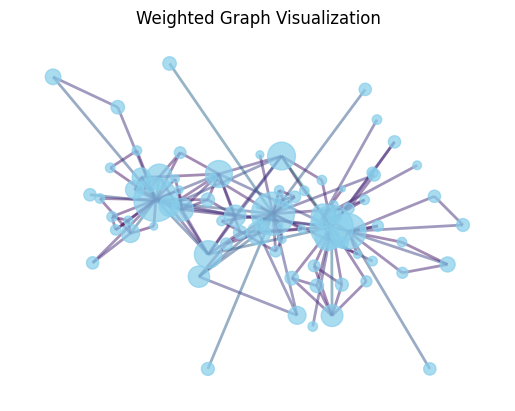

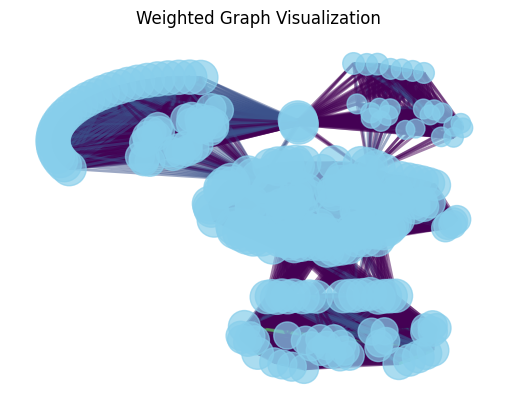

In [107]:
def visualize_weighted_graph(G):
    # Kamada-Kawai layout for positioning
    pos = nx.kamada_kawai_layout(G)
    
    # Calculate weighted degree for each node (sum of edge weights)
    weighted_degrees = {node: sum(d['weight'] for u, v, d in G.edges(node, data=True)) for node in G}
    
    # Normalize weighted degrees for node size scaling (optional scaling factor can be adjusted)
    max_weighted_degree = max(weighted_degrees.values())
    node_sizes = [1000 * (weighted_degrees[node] / max_weighted_degree) for node in G]
    
    # Edge weights for visibility (optional scaling factor can be adjusted)
    edge_weights = [d['weight'] for u, v, d in G.edges(data=True)]
    max_edge_weight = max(edge_weights)
    edge_colors = [d['weight'] / max_edge_weight for u, v, d in G.edges(data=True)]
    
    # Draw the graph without node labels
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.7)
    nx.draw_networkx_edges(G, pos, width=2, edge_color=edge_colors, alpha=0.5)
    
    plt.title('Weighted Graph Visualization')
    plt.axis('off') # Hide the axes
    plt.show()

visualize_weighted_graph(G_bottom)
visualize_weighted_graph(G_top)